Notebook to count particles on .tif files

In [73]:
from PIL import Image
import matplotlib.pyplot as plt
import trackpy 
import pims
from pims import ImageSequence
import trackpy as tp

In [74]:
plt.rcParams['figure.figsize'] = (25, 25)

In [75]:
image_file = r'E:\Ingmar\Ingmar\Experimental_data\17082022\1_10000\Overview00000.tif'

In [76]:
print(image_file)

E:\Ingmar\Ingmar\Experimental_data\17082022\1_10000\Overview00000.tif


In [77]:
im = Image.open(image_file)
im.show()

In [39]:
Img = plt.imread(image_file)

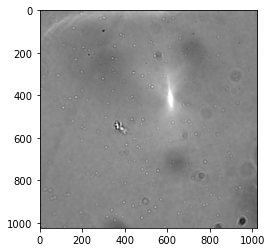

In [40]:
plt.imshow(Img, cmap='gray')

In [56]:
count_image = tp.locate(Img, 5, minmass=10000)

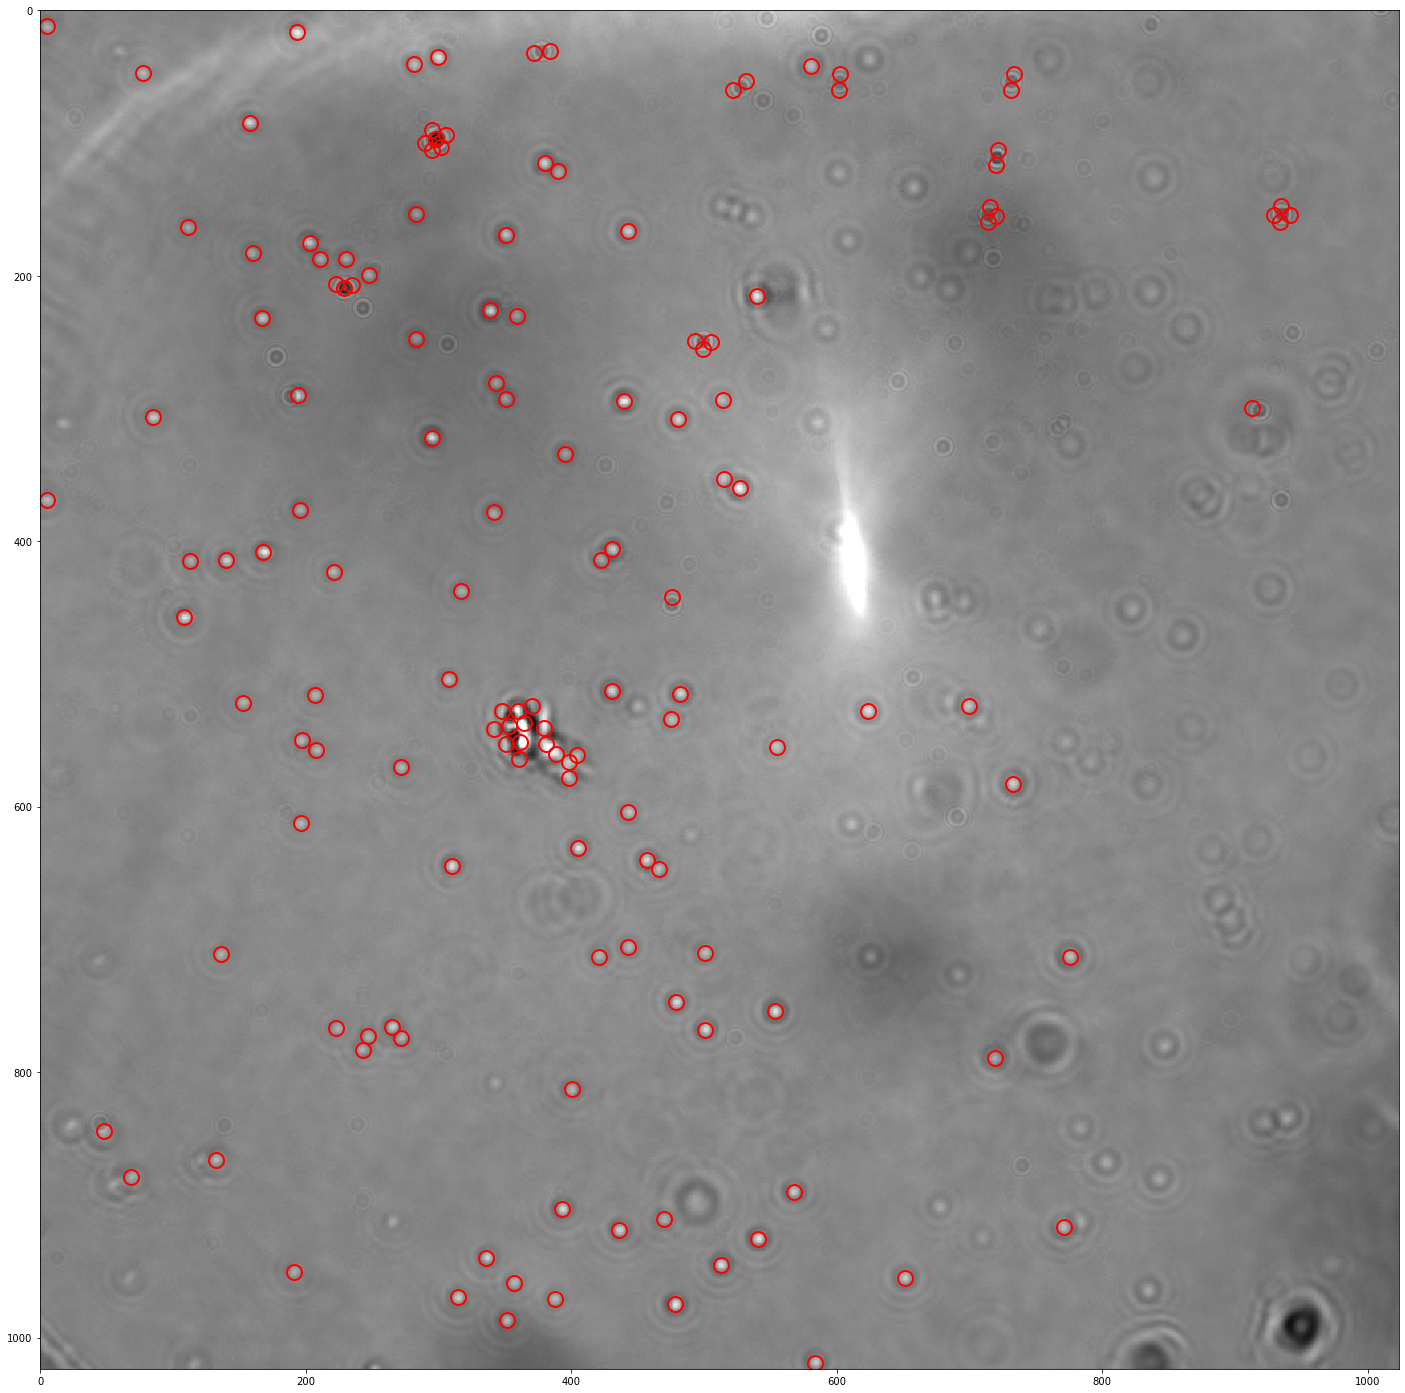

144


In [57]:
tp.annotate(count_image, Img);
print(len(count_image['mass']))

In [68]:
images = ImageSequence(r'E:\Ingmar\Ingmar\Experimental_data\17082022\1_10000\Overview*.tif')

In [69]:
length = len(images)
print(length)

11


In [87]:
@pims.pipeline
def gray(image):
    return image[:, :]

In [88]:
frames1 = gray(pims.open(r'E:\Ingmar\Ingmar\Experimental_data\17082022\1_10000\Overview*.tif'))

In [89]:
frames1
nf1 = len(frames1)
print(nf1)

11


In [104]:
plt.rcParams['figure.figsize'] = (5, 5)

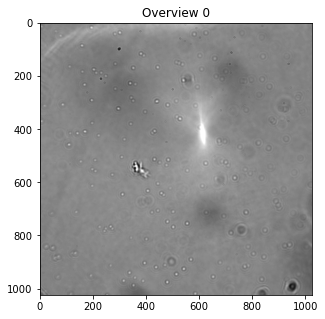

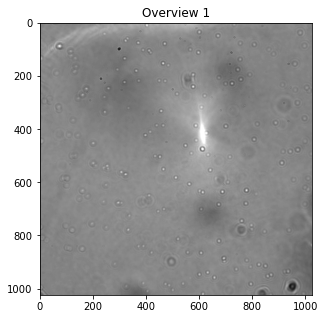

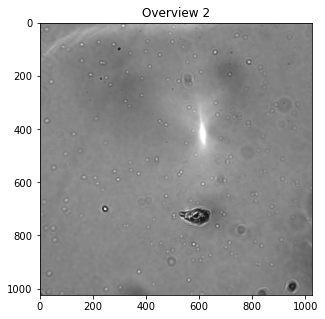

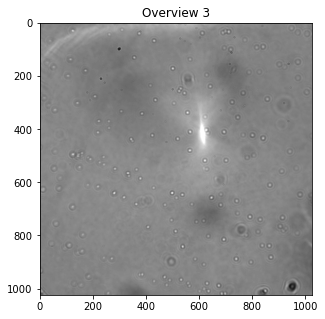

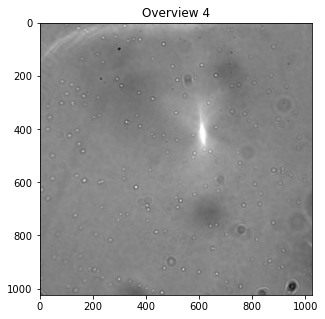

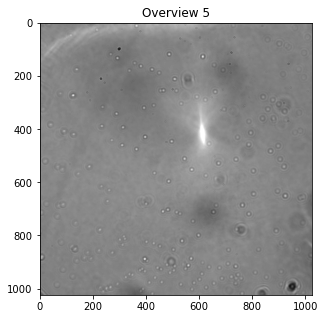

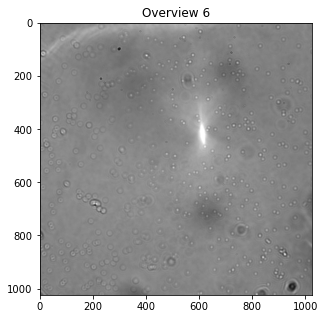

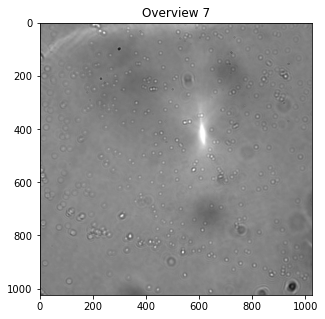

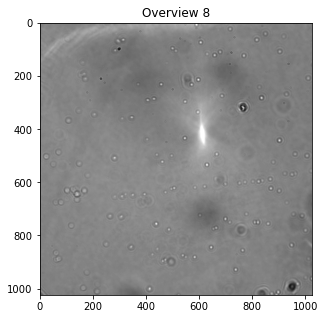

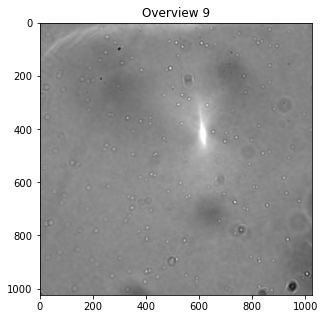

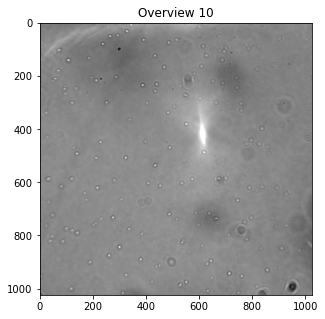

In [110]:
for i in range(0, nf1):
    plt.imshow(frames1[i], cmap='gray')
    plt.title('Overview '+str(i))
    plt.show()